In [1]:
try:
    import google.colab  # noqa: F401

    # specify the version of DataEval (==X.XX.X) for versions other than the latest
    %pip install -q dataeval[all] maite-datasets
except Exception:
    pass

In [2]:
from maite_datasets.image_classification import CIFAR10

from dataeval.data import Metadata, Select
from dataeval.data.selections import Limit, Shuffle
from dataeval.metrics.bias import balance, diversity, parity
from dataeval.metrics.stats import imagestats

In [3]:
# Load in the CIFAR10 dataset and limit to 20,000 images with random shuffling
cifar10 = Select(CIFAR10("data", image_set="base", download=True), [Limit(20000), Shuffle(seed=0)])
print(cifar10)

Select Dataset
--------------
    Selections: [Limit(size=20000), Shuffle(seed=0)]
    Selected Size: 20000

CIFAR10 Dataset
---------------
    Transforms: []
    Image_set: base
    Metadata: {'id': 'CIFAR10_base', 'index2label': {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}, 'split': 'base'}
    Path: /builds/jatic/aria/dataeval/docs/source/notebooks/data/cifar10
    Size: 60000


In [4]:
metadata = Metadata(cifar10)
print(f"Factor names: {metadata.factor_names}")

Processing datum metadata:   0%|          | 0/20000 [00:00<?, ?it/s]

Factor names: ['id', 'batch_num']


In [5]:
# Balance at index 0 is always class
balance(metadata).balance[1]

np.float64(0.00041272045581112506)

In [6]:
# Calculate image statistics
stats = imagestats(cifar10)

# Append the factors to the metadata
metadata.add_factors(stats.factors())

Processing images for PixelStat, VisualStat:   0%|          | 0/20000 [00:00<?, ?it/s]

In [7]:
# Exclude dimension statistics (as CIFAR10 images are all of uniform shape) and the batch_num
metadata.exclude = [
    "aspect_ratio",
    "width",
    "height",
    "depth",
    "channels",
    "size",
    "missing",
    "batch_num",
    "offset_x",
    "offset_y",
    "distance_center",
    "distance_edge",
]

# Provide binning for the continuous statistical factors using 10 uniform-width bins for each factor
keys = ("mean", "std", "var", "skew", "kurtosis", "entropy", "brightness", "darkness", "sharpness", "contrast", "zeros")
metadata.continuous_factor_bins = dict.fromkeys(keys, 10)

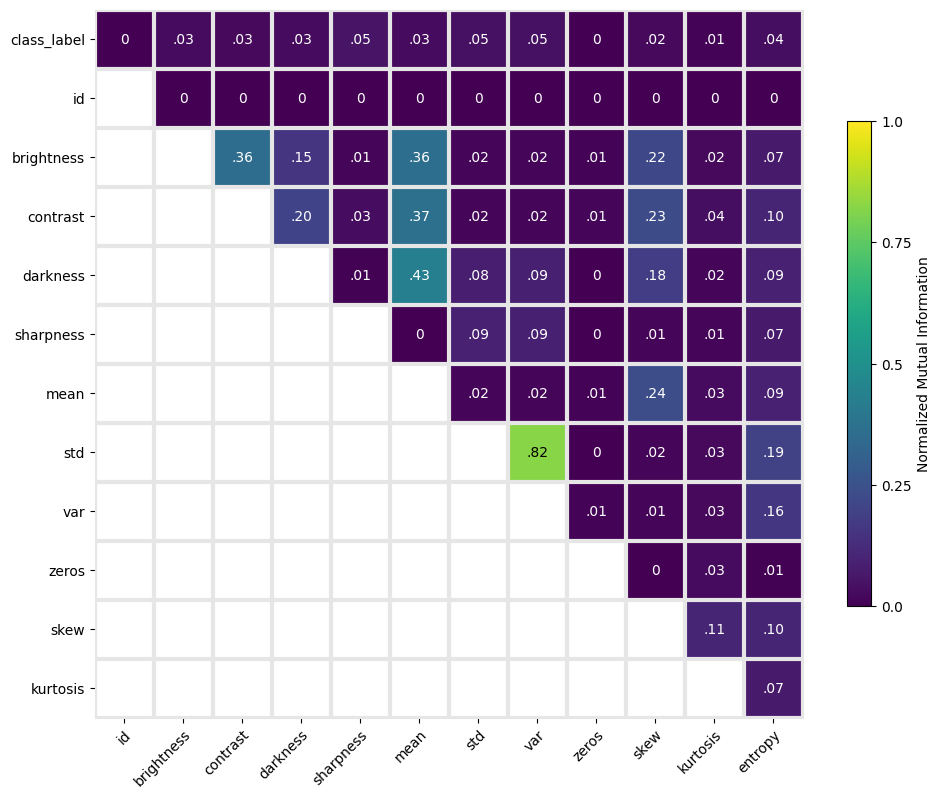

In [8]:
balance_output = balance(metadata)
_ = balance_output.plot()

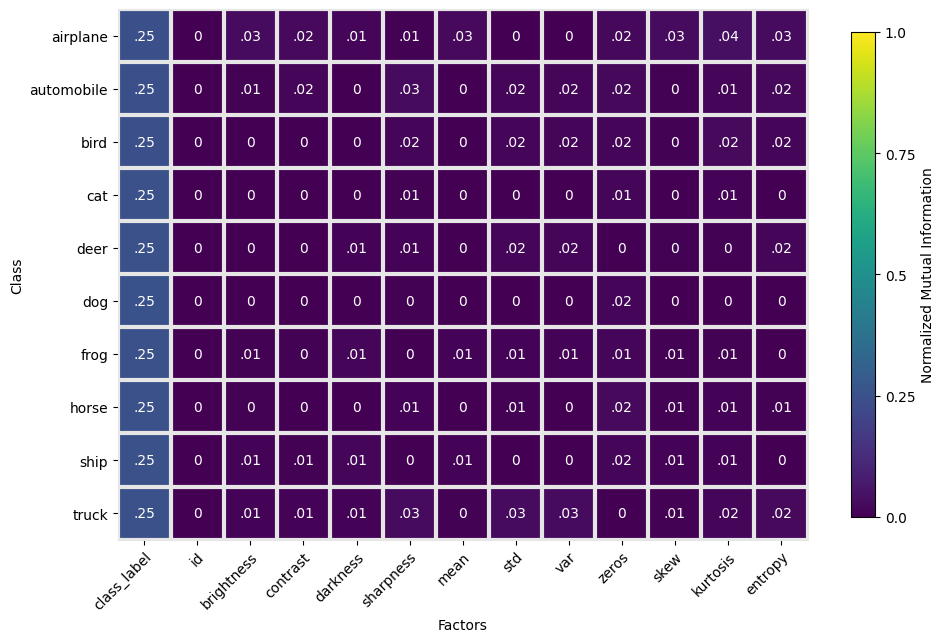

In [9]:
_ = balance_output.plot(plot_classwise=True)

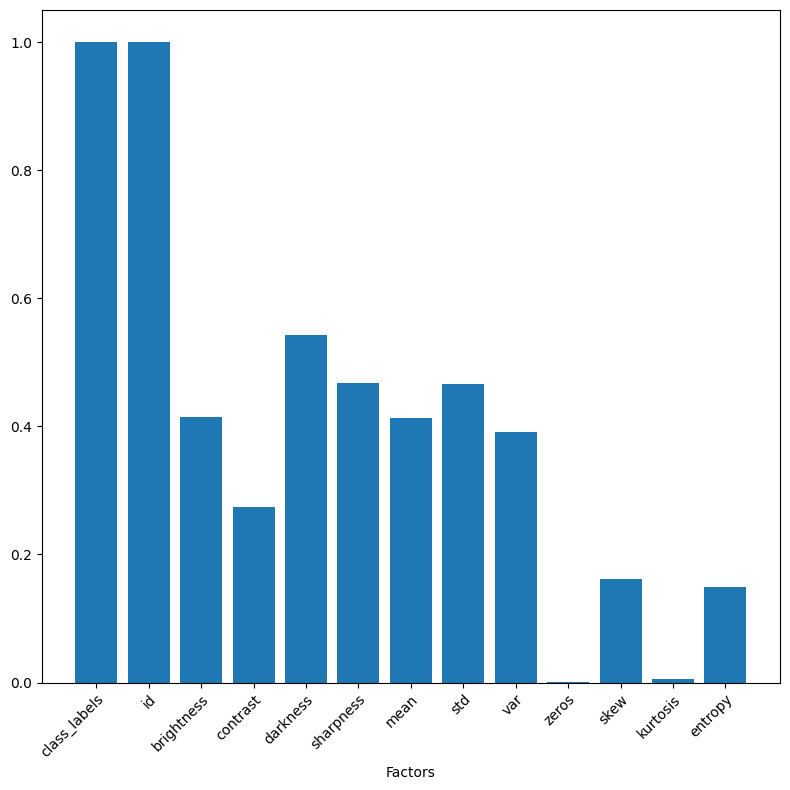

In [10]:
diversity_output = diversity(metadata)
_ = diversity_output.plot()

In [11]:
parity_output = parity(metadata)
parity_output.to_dataframe()

/builds/jatic/aria/dataeval/src/dataeval/metrics/bias/_parity.py:152: UserWarning: Factors ['id', 'brightness', 'contrast', 'darkness', 'sharpness', 'mean', 'std', 'var', 'zeros', 'skew', 'kurtosis', 'entropy'] did not meet the recommended 5 occurrences for each value-label combination.
  warnings.warn(


,score,p-value
id,180000.00,0.49
brightness,2823.68,0.00
contrast,2164.86,0.00
darkness,2553.80,0.00
sharpness,4037.49,0.00
mean,2676.55,0.00
std,3777.54,0.00
var,3623.48,0.00
zeros,105.84,0.01
skew,1921.95,0.00
